In [363]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [512]:

n_samples = 1000  # Total number of samples
active_ratio = 0.7  # Proportion of active turbines
inactive_ratio = 0.3  # Proportion of inactive turbines

# Calculate number of samples for each class
n_samples_active = int(n_samples * active_ratio)
n_samples_inactive = n_samples - n_samples_active

# Helper function to generate synthetic data
def generate_turbine_data(status, n_samples):
    np.random.seed(42)  # For reproducibility
    return pd.DataFrame({
        'WindSpeed': np.random.uniform(3, 12, n_samples) if status == 1 else np.random.uniform(0, 3, n_samples),
        'AmbientTemperature': np.random.uniform(-20, 40, n_samples),
        'RotorRPM': np.random.uniform(10, 30, n_samples) if status == 1 else np.random.uniform(0, 10, n_samples),
        'BladeLength': np.random.uniform(40, 80, n_samples),
        'BladeTemperature': np.random.uniform(-20, 40, n_samples) if status == 1 else np.random.uniform(-20, 10, n_samples),
        'Efficiency(Cp)': np.random.uniform(0.25, 0.45, n_samples),
        'TurbineStatus': [status] * n_samples
    })

# Generate data for Active (1) and Inactive (0) classes
data_active = generate_turbine_data(status=1, n_samples=n_samples_active)
data_inactive = generate_turbine_data(status=0, n_samples=n_samples_inactive)

# Combine into a single imbalanced dataset
imbalanced_data = pd.concat([data_active, data_inactive], axis=0).reset_index(drop=True)

# Shuffle the data
data = imbalanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the dataset to a CSV file
data.to_csv("turbine_data.csv", index=False)

print(f"Generated dataset with {len(data)} samples.")
print(data['TurbineStatus'].value_counts())


Generated dataset with 1000 samples.
TurbineStatus
1    700
0    300
Name: count, dtype: int64


In [449]:
data.head()

,WindSpeed,AmbientTemperature,RotorRPM,BladeLength,BladeTemperature,Efficiency(Cp),TurbineStatus
0,6.428018,-10.936526,10.064365,75.674886,-16.012200,0.298106,1
1,0.293016,22.219472,2.424705,76.571952,-5.803703,0.386224,0
2,0.366115,9.496953,0.200712,50.962209,6.058695,0.391809,0
3,6.204871,34.741801,11.245462,45.892122,-3.482707,0.352892,1
4,11.550558,-6.533566,25.287453,75.338591,20.418725,0.304400,1


In [451]:
data['TurbineStatus'].value_counts()

TurbineStatus
1    700
0    300
Name: count, dtype: int64

In [453]:
data.head()

,WindSpeed,AmbientTemperature,RotorRPM,BladeLength,BladeTemperature,Efficiency(Cp),TurbineStatus
0,6.428018,-10.936526,10.064365,75.674886,-16.012200,0.298106,1
1,0.293016,22.219472,2.424705,76.571952,-5.803703,0.386224,0
2,0.366115,9.496953,0.200712,50.962209,6.058695,0.391809,0
3,6.204871,34.741801,11.245462,45.892122,-3.482707,0.352892,1
4,11.550558,-6.533566,25.287453,75.338591,20.418725,0.304400,1


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'WindSpeed'),
  Text(1, 0, 'AmbientTemperature'),
  Text(2, 0, 'RotorRPM'),
  Text(3, 0, 'BladeLength'),
  Text(4, 0, 'BladeTemperature'),
  Text(5, 0, 'Efficiency(Cp)'),
  Text(6, 0, 'TurbineStatus')])

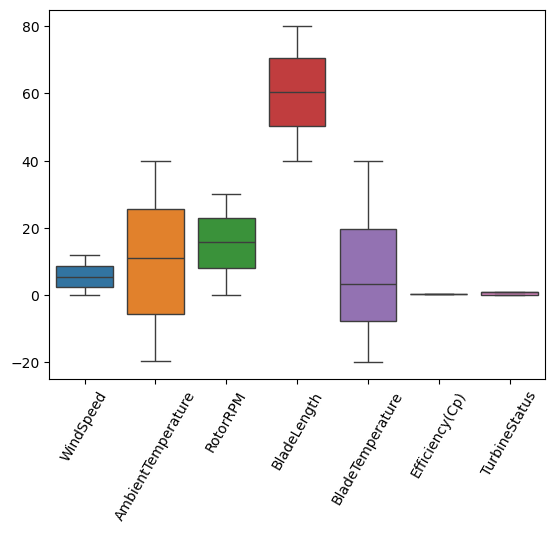

In [455]:
sns.boxplot(data)
plt.xticks(rotation=60)

In [457]:
data['TurbineStatus'].value_counts()

TurbineStatus
1    700
0    300
Name: count, dtype: int64

In [459]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [461]:
data.head()

,WindSpeed,AmbientTemperature,RotorRPM,BladeLength,BladeTemperature,Efficiency(Cp),TurbineStatus
0,6.428018,-10.936526,10.064365,75.674886,-16.012200,0.298106,1
1,0.293016,22.219472,2.424705,76.571952,-5.803703,0.386224,0
2,0.366115,9.496953,0.200712,50.962209,6.058695,0.391809,0
3,6.204871,34.741801,11.245462,45.892122,-3.482707,0.352892,1
4,11.550558,-6.533566,25.287453,75.338591,20.418725,0.304400,1


In [463]:
X=data[['WindSpeed', 'AmbientTemperature', 'RotorRPM', 'BladeLength', 'BladeTemperature']]
y=data['TurbineStatus']

In [465]:
X.head()

,WindSpeed,AmbientTemperature,RotorRPM,BladeLength,BladeTemperature
0,6.428018,-10.936526,10.064365,75.674886,-16.012200
1,0.293016,22.219472,2.424705,76.571952,-5.803703
2,0.366115,9.496953,0.200712,50.962209,6.058695
3,6.204871,34.741801,11.245462,45.892122,-3.482707
4,11.550558,-6.533566,25.287453,75.338591,20.418725


In [467]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [469]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [471]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [473]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4
0,0.386720,0.276115,1.624392,1.430831,-1.104340
1,-0.474561,-0.348675,-0.393865,-0.883976,-0.876282
2,1.641556,-0.269036,-0.280593,0.396938,-1.322832
3,0.072993,1.403873,0.223512,1.471149,1.826311
4,0.545291,-0.163045,0.625794,-0.687746,-0.123068
...,...,...,...,...,...
695,-1.316312,1.649719,-1.012253,-0.545869,-1.308847
696,-0.401322,-0.352953,1.153051,0.093513,-0.372860
697,-0.982042,0.140621,-1.588635,-1.088435,-1.483435
698,-0.320647,1.081459,0.570902,-1.659378,0.835403


In [475]:
LR_model=LogisticRegression(class_weight='balanced', random_state=42)

In [477]:
LR_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [479]:
LR_model.score(X_test_scaled,y_test)

0.9933333333333333

In [481]:
LR_model.score(X_train_scaled,y_train)

0.9985714285714286

In [483]:
ytest_predict=LR_model.predict(X_test_scaled)
ytrain_predict=LR_model.predict(X_train_scaled)

In [485]:
from sklearn.metrics import classification_report,confusion_matrix

In [487]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.99      1.00       208

    accuracy                           0.99       300
   macro avg       0.99      1.00      0.99       300
weighted avg       0.99      0.99      0.99       300



In [489]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       492

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [491]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers available for logistic regression
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}


In [493]:
grid_search = GridSearchCV(LR_model, param_grid, cv=5, scoring='accuracy', verbose=1)


In [495]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [497]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'solver': 'saga'}

In [499]:
best_model = grid_search.best_estimator_


In [501]:
best_model.score(X_train_scaled,y_train)

1.0

In [503]:
best_model.score(X_test_scaled,y_test)

0.9966666666666667

In [505]:
y_pred = best_model.predict(X_test_scaled)

In [507]:
print(classification_report(y_test, ytest_predict))
print(confusion_matrix(y_test, ytest_predict))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.99      1.00       208

    accuracy                           0.99       300
   macro avg       0.99      1.00      0.99       300
weighted avg       0.99      0.99      0.99       300

[[ 92   0]
 [  2 206]]


In [509]:
joblib.dump(best_model, "turbine_model1.pkl")


['turbine_model1.pkl']